# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:
print(boston['DESCR'])   # descripción del dataset
boston['data']           # matriz con los datos de entrada (atributos)
boston['target']         # vector de valores a predecir (precio de los inmuebles en Boston)
boston['feature_names']  # nombres de los atributos para cada columna de 'data'

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

Disponemos de 506 filas de datos. Cada dato tiene 13 atributos. 

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [ ]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

Obtenemos así un dataset de entrenamiento con 404 datos y un dataset para testeo de 102 datos. 

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.


## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

#### Gráfico para cada atributo 

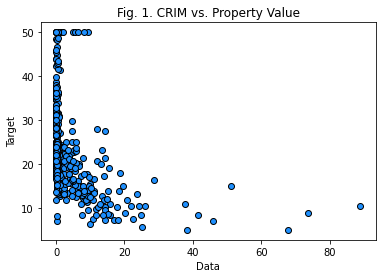

In [ ]:
# 1. Resolver acá. Ayuda/ejemplo:
feature = 'CRIM'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title('Fig. 1. '+feature + ' vs. Property Value')
plt.ylabel('Target')
plt.xlabel('Data')
plt.show()

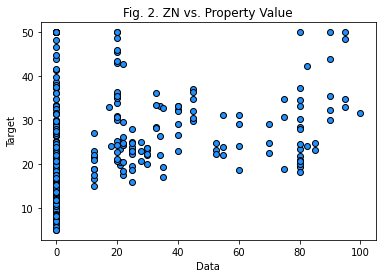

In [ ]:
feature = 'ZN'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title('Fig. 2. '+feature + ' vs. Property Value')
plt.ylabel('Target')
plt.xlabel('Data')
plt.show()

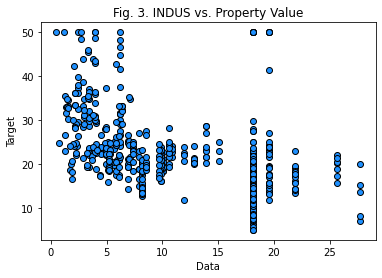

In [ ]:
feature = 'INDUS'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title('Fig. 3. '+feature + ' vs. Property Value')
plt.ylabel('Target')
plt.xlabel('Data')
plt.show()

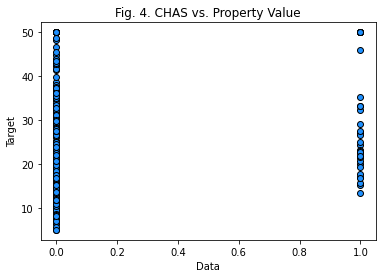

In [ ]:
feature = 'CHAS'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title('Fig. 4. '+feature + ' vs. Property Value')
plt.ylabel('Target')
plt.xlabel('Data')
plt.show()

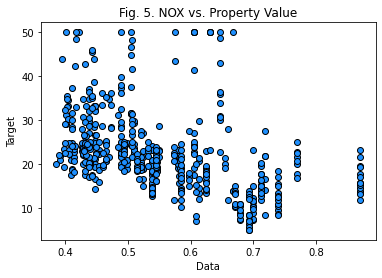

In [ ]:
feature = 'NOX'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title('Fig. 5. '+feature + ' vs. Property Value')
plt.ylabel('Target')
plt.xlabel('Data')
plt.show()

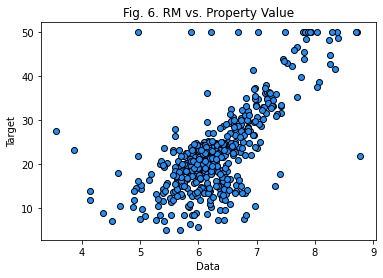

In [ ]:
feature = 'RM'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title('Fig. 6. '+feature + ' vs. Property Value')
plt.ylabel('Target')
plt.xlabel('Data')
plt.show()

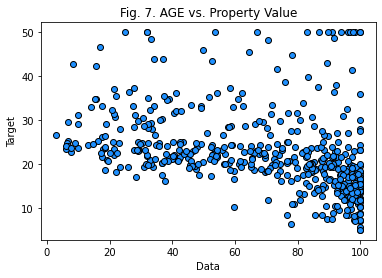

In [ ]:
feature = 'AGE'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title('Fig. 7. '+feature + ' vs. Property Value')
plt.ylabel('Target')
plt.xlabel('Data')
plt.show()

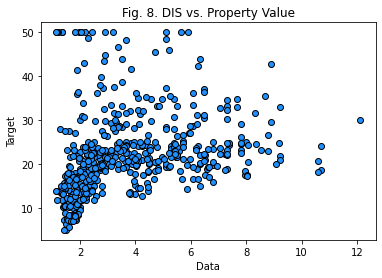

In [ ]:
feature = 'DIS'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title('Fig. 8. '+feature + ' vs. Property Value')
plt.ylabel('Target')
plt.xlabel('Data')
plt.show()

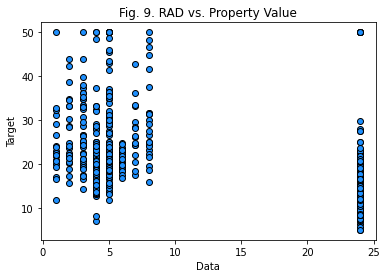

In [ ]:
feature = 'RAD'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title('Fig. 9. '+feature + ' vs. Property Value')
plt.ylabel('Target')
plt.xlabel('Data')
plt.show()

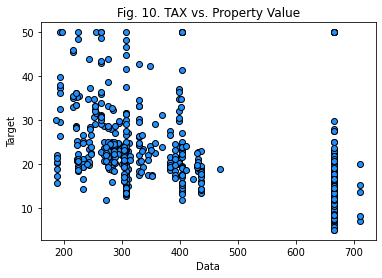

In [ ]:
feature = 'TAX'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title('Fig. 10. '+feature + ' vs. Property Value')
plt.ylabel('Target')
plt.xlabel('Data')
plt.show()

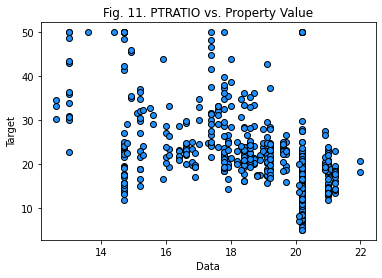

In [ ]:
feature = 'PTRATIO'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title('Fig. 11. '+feature + ' vs. Property Value')
plt.ylabel('Target')
plt.xlabel('Data')
plt.show()

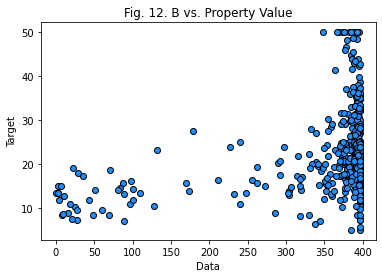

In [ ]:
feature = 'B'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title('Fig. 12. '+feature + ' vs. Property Value')
plt.ylabel('Target')
plt.xlabel('Data')
plt.show()

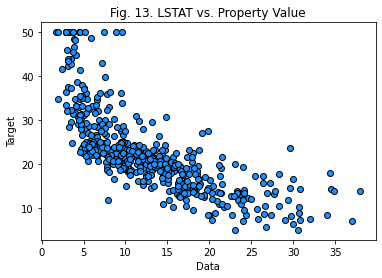

In [ ]:
feature = 'LSTAT'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title('Fig. 13. '+feature + ' vs. Property Value')
plt.ylabel('Target')
plt.xlabel('Data')
plt.show()

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

1- El atributo seleccionado es LSTAT. Elegimos dicho atributo porque parece ser el que presenta una relación más lineal con el target a partir de lo que se observa en las gráficas. Veremos entonces si a partir de dicho atributo podemos estimar el valor de la propiedad haciendo uso de la regresion lineal. 

In [ ]:
# 1. Resolver acá. Ayuda:
feature = 'LSTAT'  # selecciono el atributo 'LSTAT'
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]

print(X_train_f.shape, X_test_f.shape) 
print(y_train.shape, y_test.shape)

(404, 1) (102, 1)
(404,) (102,)


2 - 

In [ ]:
# 2. Instanciar y entrenar acá.
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True) 
model=lr.fit(X_train_f, y_train)


3 -

In [ ]:
# 3. Predecir y evaluar acá.
from sklearn.metrics import mean_squared_error

y_test_pred = model.predict(X_test_f)
y_train_pred = model.predict(X_train_f)

train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print(f'Train error: {train_error}')
print(f'Test error: {test_error}')

Train error: 36.52396640695966
Test error: 46.336305360025925


Observemos que el error cuadratico medio para el conjunto de test es menor que 50! 

4 -

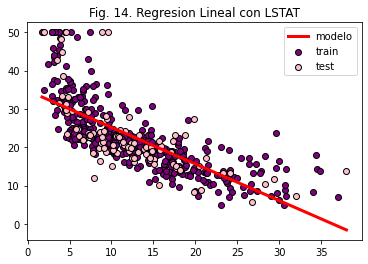

In [ ]:
# 4. Graficar acá. Ayuda:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
plt.plot(x, model.predict(x), color="red", lw=3, label="modelo")
plt.scatter(X_train_f, y_train, facecolor="purple", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="pink", edgecolor="k", label="test")
plt.title('Fig. 14. Regresion Lineal con '+feature)
plt.legend()
plt.show()

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

1 - 

In [ ]:
X_train_f = X_train_f.reshape(-1, 1)
X_test_f = X_test_f.reshape(-1, 1)
X_train_f.shape, X_test_f.shape


((404, 1), (102, 1))

In [ ]:
# 1. Resolver acá.

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


In [ ]:
train_errors = []
test_errors = []
degrees = np.arange(0,14,1)
for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=True)
    model = make_pipeline(pf, lr)
    model.fit(X_train_f, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_f)
    y_test_pred = model.predict(X_test_f)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

Imprimimos los errores cuadraticos medios para polinomios desde grado 0 hasta grado 13. 

In [ ]:
train_errors, test_errors

([85.1437202235075,
  36.52396640695966,
  28.18917233416823,
  26.784846496749747,
  25.849432858865956,
  25.03496253774961,
  25.01402800424349,
  25.01353496965471,
  24.845822976448705,
  24.82577315119438,
  24.79800481355994,
  26.342981752400885,
  28.464708791176786,
  31.03423442994223],
 [81.58231743908229,
  46.336305360025946,
  38.8468686617072,
  37.22424226843414,
  34.70486859807189,
  34.83470817648442,
  34.32620684168287,
  34.26111455902268,
  36.41559279319129,
  34.85725798480081,
  41.66724309060869,
  39.49116932644638,
  76.98475197369297,
  202.70974094834057])

2 -

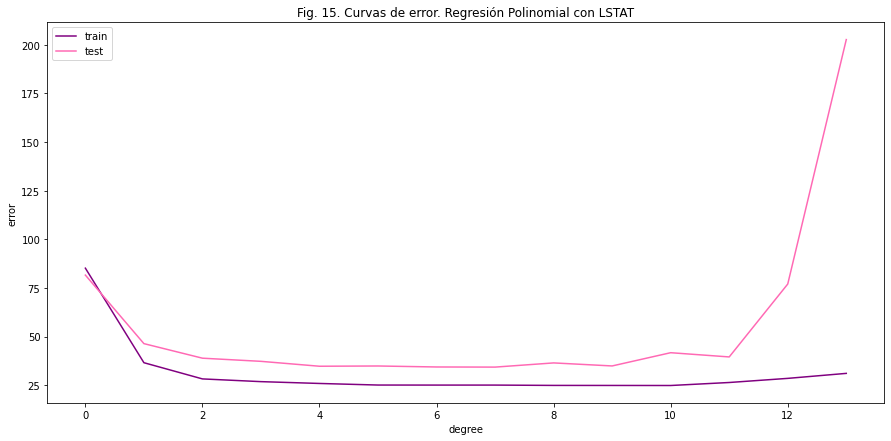

In [ ]:
# 2. Graficar curvas de error acá.
plt.figure(figsize=(15,7))
plt.plot(degrees, train_errors, color="purple", label="train")
plt.plot(degrees, test_errors, color="hotpink", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.title('Fig. 15. Curvas de error. Regresión Polinomial con LSTAT')
plt.show()

3 - Hacemos "zoom":

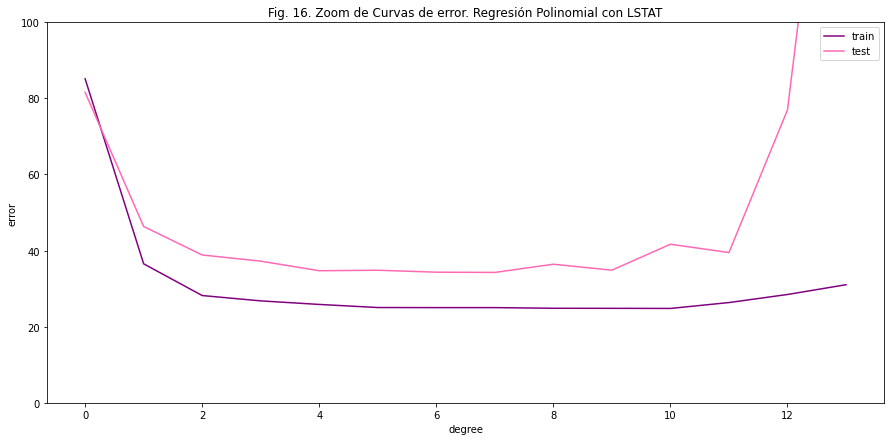

In [ ]:
# 2. Graficar curvas de error acá.
plt.figure(figsize=(15,7))
plt.plot(degrees, train_errors, color="purple", label="train")
plt.plot(degrees, test_errors, color="hotpink", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.title('Fig. 16. Zoom de Curvas de error. Regresión Polinomial con LSTAT')
plt.ylim(0,100)
plt.show()

Se observa que hasta grado 7 el polinomio ajusta bien. Para grados mayores se empieza a observar que el error para el conjunto de test crece hasta explotar para grado 13. 

4 - Luego, elegimos un ajuste polinomial de grado 7 para trabajar nuestros datos. 

In [ ]:
degree = 7
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train_f, y_train);

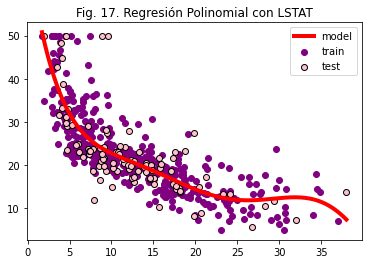

In [ ]:
plt.scatter(X_train_f, y_train, color="purple", label="train")
plt.scatter(X_test_f, y_test, color="pink", edgecolor="k", label="test")
plt.plot(x, model.predict(x.reshape(-1, 1)), color="red", lw=4, label="model")
plt.title('Fig. 17. Regresión Polinomial con LSTAT')
plt.legend()
plt.show()

In [ ]:
train_errors[7], test_errors[7]

(25.01353496965471, 34.26111455902268)

Con un error cuadratico medio para el conjunto de test de 34.26. 

In [ ]:
print('Los coeficientes de dicho polinomio son: ' , lr.coef_)

Los coeficientes de dicho polinomio son:  [ 0.00000000e+00  2.77256099e-06 -5.29226393e-07 -4.14808786e-06
 -2.61946086e-05 -1.21909495e-04 -3.14581719e-04  9.04154523e-05
 -1.06560336e-05  6.85494839e-07 -2.60982822e-08  5.88712395e-10
 -7.28978511e-12  3.82440958e-14]


## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

1 - Elegimos los tres atributos que hemos considerado más relevantes: CRIM (la tasa de criminalidad), RM (el numero de habitaciones) y LSTAT (el % de personas de "bajo" status).

In [ ]:
# 1. Resolver acá. Ayuda (con dos atributos):
selector = (boston['feature_names'] == 'CRIM') | (boston['feature_names'] == 'RM') | (boston['feature_names'] == 'LSTAT')
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((404, 3), (102, 3))

2 - 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


In [ ]:
train_errors = []
test_errors = []
degrees = np.arange(1,6,1)
for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=True)
    model = make_pipeline(pf, lr)
    model.fit(X_train_fs, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_fs)
    y_test_pred = model.predict(X_test_fs)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

In [ ]:
train_errors, test_errors

([27.786404734031777,
  15.833819610510536,
  12.288848370247354,
  8.38141478811864,
  7.811617935038886],
 [38.75831314024686,
  31.846827587454644,
  52.84915450482619,
  43.43722708137326,
  402.474738448152])

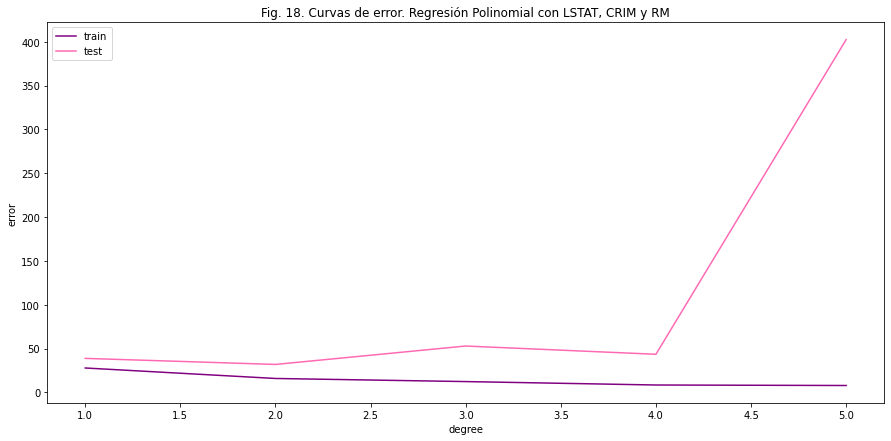

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(degrees, train_errors, color="purple", label="train")
plt.plot(degrees, test_errors, color="hotpink", label="test")
plt.legend()
plt.xlabel("degree")
plt.title('Fig. 18. Curvas de error. Regresión Polinomial con LSTAT, CRIM y RM')
plt.ylabel("error")
plt.show()

Hacemos ZOOM:

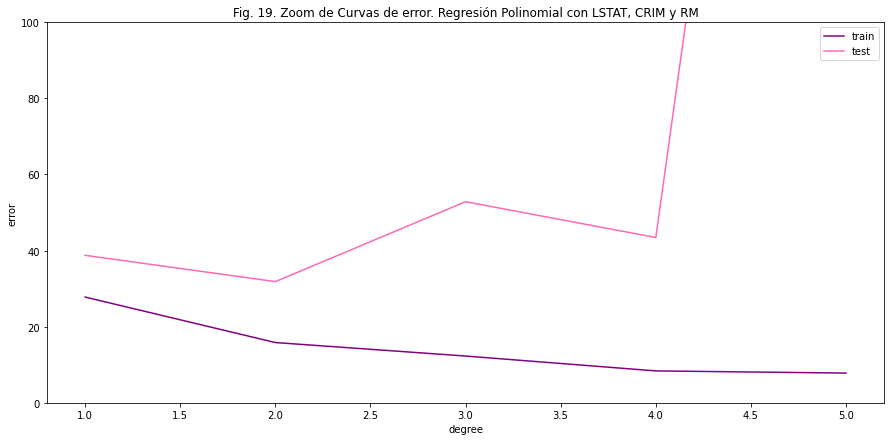

In [ ]:
# 2. Graficar curvas de error acá.
plt.figure(figsize=(15,7))
plt.plot(degrees, train_errors, color="purple", label="train")
plt.plot(degrees, test_errors, color="hotpink", label="test")
plt.legend()
plt.title('Fig. 19. Zoom de Curvas de error. Regresión Polinomial con LSTAT, CRIM y RM')
plt.xlabel("degree")
plt.ylabel("error")
plt.ylim(0,100)
plt.show()

In [ ]:
print('Los errores de entrenamiento y test para el polinomio de grado 2 son: ')
train_errors[1], test_errors[1]

Los errores de entrenamiento y test para el polinomio de grado 2 son: 


(15.833819610510536, 31.846827587454644)

Luego, este error en el conjunto de test es menor que el error en dicho conjunto obtenido con el ajuste polinomial de grado 7 pero empleando un solo atributo (34.26111455902268). Por ende, este modelo es mejor que el ajuste polinomial de grado 7. 

## Más ejercicios (opcionales)

### Ejercicio 6: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.




Analicemos si incluir todos los atributos mejora o no la situacion:

In [ ]:
# Si deseamos usar todos los atributos, construimos "selector" como sigue:

selector_all = np.ones((boston['feature_names'].shape[0]), dtype=bool)

X_train_fss = X_train[:, selector_all]
X_test_fss = X_test[:, selector_all]
X_train_fss.shape, X_test_fss.shape



((404, 13), (102, 13))

In [ ]:
from sklearn.metrics import mean_squared_error

train_errors = []
test_errors = []
degrees = np.arange(1,4,1)
for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=True)
    model = make_pipeline(pf, lr)
    model.fit(X_train_fss, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_fss)
    y_test_pred = model.predict(X_test_fss)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

In [ ]:
train_errors, test_errors

([19.326470203585725, 6.310156128322766, 2.3090374648984887e-11],
 [33.44897999767653, 25.215797416856976, 1050370.6616399244])

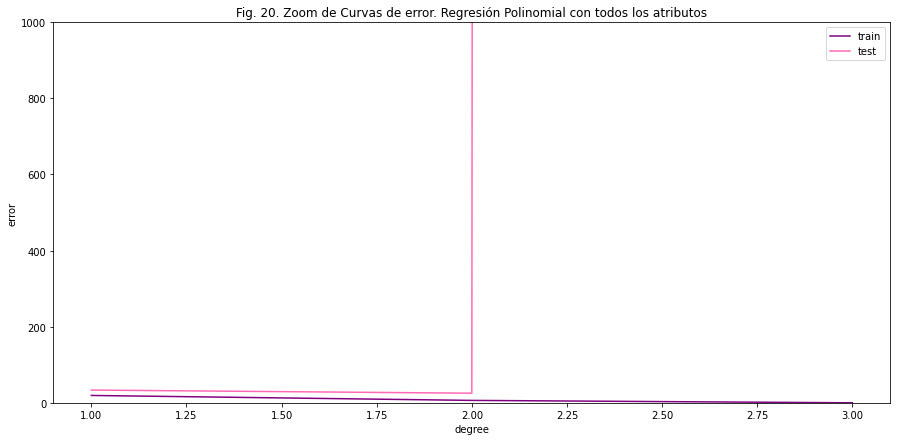

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(degrees, train_errors, color="purple", label="train")
plt.plot(degrees, test_errors, color="hotpink", label="test")
plt.legend()
plt.title('Fig. 20. Zoom de Curvas de error. Regresión Polinomial con todos los atributos')
plt.xlabel("degree")
plt.ylabel("error")
plt.ylim(0,1000)
plt.show()

En la Fig. 20 se observa que el polinomio de grado 2 es el que mejor ajusta los datos de test. 

In [ ]:
print('Los errores de entrenamiento y test para el polinomio de grado 2 son: ')
train_errors[1], test_errors[1]

Los errores de entrenamiento y test para el polinomio de grado 2 son: 


(6.310156128322766, 25.215797416856976)

Luego, hemos conseguido un error para el conjunto de test de 25.22. Es decir, hemos disminuido el error cuadratico medio de 31.846827587454644 que obteniamos al emplear solo tres atributos para predecir el target. Concluimos entonces que este modelo mejora los resultados. 

### Ejercicio 7: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?

In [ ]:
selector_all=np.ones((boston['feature_names'].shape[0]), dtype=bool)

X_train_fss = X_train[:, selector_all]
X_test_fss = X_test[:, selector_all]
print(X_train_fss.shape, X_test_fss.shape)


from sklearn.linear_model import Ridge

train_errors = []
test_errors = []
degrees = np.arange(1,4,1) #xq tiene que arrancar dsd 1?
alfa=1
for degree in degrees:

    # train:
    pf = PolynomialFeatures(degree)
    #lr = LinearRegression(fit_intercept=True)
    rd = Ridge(alpha=alfa)
    model = make_pipeline(pf, rd)
    model.fit(X_train_fss, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_fss)
    y_test_pred = model.predict(X_test_fss)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)


(404, 13) (102, 13)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


In [ ]:
print('Con un valor de alpha = '+ str(alfa) + ', los errores de test son: ')
test_errors


Con un valor de alpha = 1, los errores de test son: 


[34.23160611061538, 31.7253698777455, 1003.7425258536407]

Luego, para el alpha indicado, el polinomio de orden 2, con un error de 31.72 es el que mejor ajusta. 

Que pasa si agrandamos el valor de alpha?

In [ ]:
train_errors = []
test_errors = []
degrees = np.arange(1,4,1) #xq tiene que arrancar dsd 1?
alfa=2
for degree in degrees:

    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=True)
    rd = Ridge(alpha=alfa)
    model = make_pipeline(pf, rd)
    model.fit(X_train_fss, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_fss)
    y_test_pred = model.predict(X_test_fss)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


In [ ]:
print('Con un valor de alpha = '+ str(alfa) + ', el error de test para un polinomio de orden 2 es: ')
test_errors[1]


Con un valor de alpha = 2, el error de test para un polinomio de orden 2 es: 


29.90081811320309

Notamos que disminuye el valor del error a medida que aumenta el valor de alpha. Si ahora elegimos alpha=10:

In [ ]:
train_errors = []
test_errors = []
degrees = np.arange(1,4,1) #xq tiene que arrancar dsd 1?
alfa=10
for degree in degrees:

    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=True)
    rd = Ridge(alpha=alfa)
    model = make_pipeline(pf, rd)
    model.fit(X_train_fss, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_fss)
    y_test_pred = model.predict(X_test_fss)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


In [ ]:
print('Con un valor de alpha = '+ str(alfa) + ', el error de test para un polinomio de orden 2 es: ')
test_errors[1]


Con un valor de alpha = 10, el error de test para un polinomio de orden 2 es: 


24.6050262223108

Luego, tiene sentido continuar incrementando el valor de alpha o en algun momento "satura"? Veamos eso:


In [ ]:
train_errors = []
test_errors = []
aux0=[]
aux1=[]
degrees = np.arange(1,4,1) #xq tiene que arrancar dsd 1?
for alfa in np.arange(1,500,10):
  
  train_errors = []
  test_errors = [] 
  
  for degree in degrees:
    
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=True)
    rd = Ridge(alpha=alfa)
    model = make_pipeline(pf, rd)
    model.fit(X_train_fss, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_fss)
    y_test_pred = model.predict(X_test_fss)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)
    
  aux0.append(alfa)
  aux1.append(test_errors[1])
  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.p

Text(0, 0.5, 'Error en el conjunto de test')

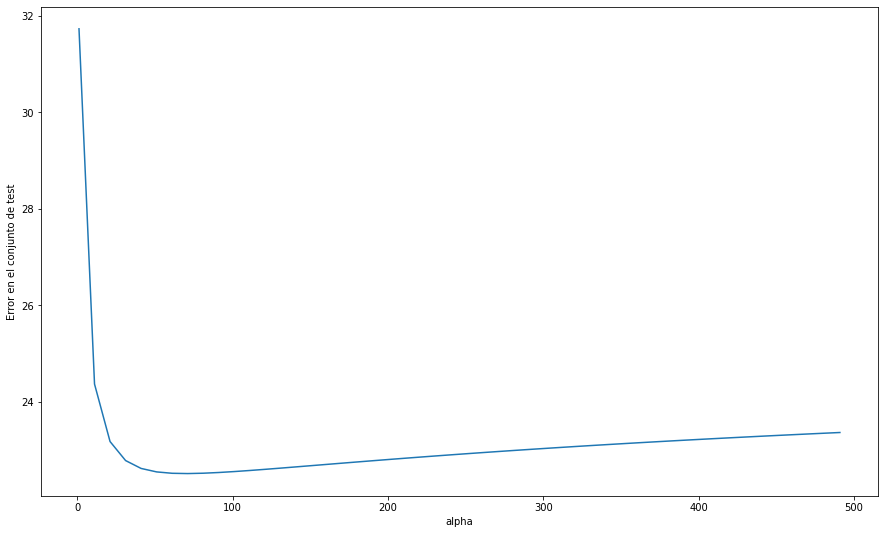

In [ ]:
plt.figure(figsize=(15,9))
plt.plot(aux0,aux1)
plt.xlabel('alpha')
plt.ylabel('Error en el conjunto de test')


In [ ]:
min=np.where(aux1==np.min(aux1))
print(int(min[0]))
print('El valor optimo de alpha es: ' , aux0[int(min[0])], ', donde el error en el test es: ',aux1[int(min[0])])

7
El valor optimo de alpha es:  71 , donde el error en el test es:  22.514575451647975


Nos quedamos con ese alpha. Entonces:

In [ ]:
train_errors = []
test_errors = []
degrees = np.arange(1,4,1) #xq tiene que arrancar dsd 1?
alfa=aux0[int(min[0])]
for degree in degrees:

    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=True)
    rd = Ridge(alpha=alfa)
    model = make_pipeline(pf, rd)
    model.fit(X_train_fss, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_fss)
    y_test_pred = model.predict(X_test_fss)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


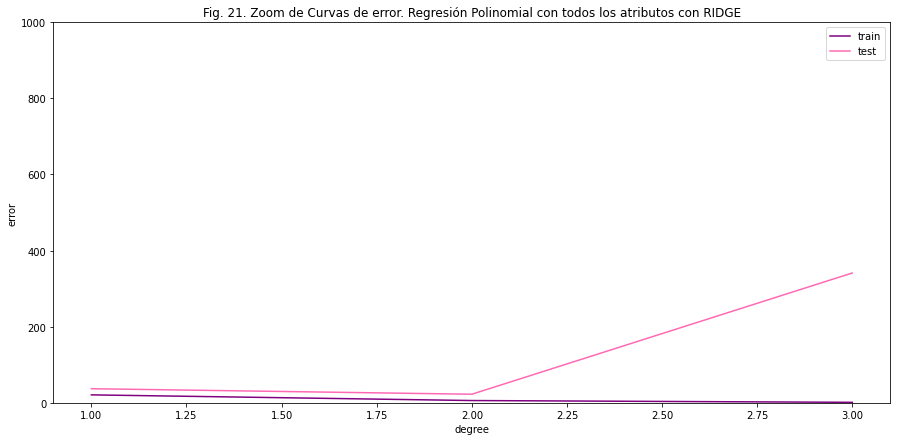

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(degrees, train_errors, color="purple", label="train")
plt.plot(degrees, test_errors, color="hotpink", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.title('Fig. 21. Zoom de Curvas de error. Regresión Polinomial con todos los atributos con RIDGE')
plt.ylim(0,1000)
plt.show()

In [ ]:
print('Los errores de entrenamiento y test para el polinomio de grado 2 con RIDGE son: ')
train_errors[1], test_errors[1]

Los errores de entrenamiento y test para el polinomio de grado 2 con RIDGE son: 


(5.937123931851173, 22.514575451647975)

En conclusión, hemos obtenido el mejor modelo haciendo uso de todos los atributos para realizar una regresion polinomial. Encontramos que el grado optimo del polinomio era el 2 y que si aplicabamos un termino de regularizacion (alpha), optimizabamos el error en el conjunto de test. Finalmente, encontramos el valor optimo de alpha lo que nos permitio disminuir el valor del error para el conjunto de test hasta un valor final de 22.51.